# Proyecto de Clasificación de Alzheimer con Redes Neuronales
## Metodología CRISP-DM: Fase 1 y 2

Este notebook cubre las dos primeras etapas del proyecto: Comprensión del Negocio y Comprensión de los Datos, que incluye un Análisis Exploratorio de Datos (AED) completo.

## Fase 1: Comprensión del Negocio (Business Understanding)
En esta primera fase, definimos los objetivos del proyecto y los criterios de éxito. Aunque es un proyecto académico, lo tratamos como un problema real.

### 1.1. Objetivo Principal
El objetivo central es desarrollar y evaluar modelos de Deep Learning capaces de clasificar imágenes de resonancia magnética (MRI) cerebral en cuatro categorías distintas de la enfermedad de Alzheimer:
* No Dementes (Sin demencia)
* Demencia muy leve
* Demencia leve
* Demencia moderada

### 1.2. Objetivos Específicos
* Análisis de Datos: Realizar un análisis exploratorio exhaustivo del dataset para entender la distribución de las clases, la calidad y las características de las imágenes.
* Preprocesamiento: Preparar y acondicionar las imágenes para que puedan ser procesadas eficientemente por los modelos de redes neuronales.
* Modelado y Comparación:
    * Construir, entrenar y evaluar un modelo de Red Neuronal Artificial (RNA) tradicional.
    * Construir, entrenar y evaluar un modelo de Red Neuronal Convolucional (CNN), especializada en el reconocimiento de imágenes.
* Evaluación: Medir el rendimiento de ambos modelos utilizando métricas clave como Accuracy, Precision, Recall, F1-Score y la Curva ROC. Analizar críticamente los resultados, prestando especial atención al impacto del desbalanceo de clases.

### 1.3. Criterios de Éxito
* Criterio Mínimo: Lograr un modelo que supere la clasificación aleatoria y demuestre capacidad de aprendizaje, con un Accuracy superior al 50%.
* Criterio Deseado: Desarrollar un modelo CNN que alcance un Accuracy superior al 80% en el conjunto de prueba, demostrando un rendimiento robusto.
* Criterio Principal: Entregar dos notebooks funcionales, bien documentados y organizados, que sigan la metodología CRISP-DM y presenten una comparación clara y justificada del rendimiento entre el modelo RNA y el CNN.

## Fase 2: Comprensión de los Datos (Data Understanding)
Ahora que el objetivo está claro, nos sumergimos en los datos. Esta fase incluye la carga de los datos y el Análisis Exploratorio (AED).

### 2.1. Importación de Librerías
Primero, importamos todas las librerías que necesitaremos para el análisis.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Configuraciones para una mejor visualización
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

### 2.2. Carga de Datos
Dado que los datos están en formato Parquet, el proceso de carga es mucho más directo. Usaremos pandas para leer los archivos. Es posible que necesites instalar la librería pyarrow para que pandas pueda leer este formato (pip install pyarrow).


In [ ]:
train_file = os.path.join('train.parquet', 'train.parquet')
test_file = os.path.join('test.parquet', 'test.parquet')

# Verificamos si las rutas existen
if not os.path.exists(train_file) or not os.path.exists(test_file):
    print(f"Error: No se encontraron los archivos .parquet.")
    print(f"Asegúrate de que la estructura de carpetas y nombres de archivo sea correcta.")
else:
    print("Archivos .parquet encontrados. Cargando datos...")
    
    # Intentamos cargar los dataframes
    try:
        train_df = pd.read_parquet(train_file)
        test_df = pd.read_parquet(test_file)
        
        # Añadimos la columna 'split' para identificar el origen de los datos
        train_df['split'] = 'train'
        test_df['split'] = 'test'

        # Combinamos ambos dataframes para el análisis exploratorio
        df = pd.concat([train_df, test_df], ignore_index=True)
        
        print(f"Carga completa. Se encontraron {len(df)} imágenes en total.")
        print(f"({len(train_df)} en entrenamiento y {len(test_df)} en prueba)") 

    except Exception as e:
        print(f"Ocurrió un error al leer los archivos parquet: {e}")
        print("Asegúrate de haber instalado 'pyarrow' y reiniciado el kernel.")

Archivos .parquet encontrados. Cargando datos...
Carga completa. Se encontraron 6400 imágenes en total.
(5120 en entrenamiento y 1280 en prueba)


### 2.3. Análisis Exploratorio de Datos (AED)
En esta sección, realizaremos una investigación profunda de los datos para descubrir patrones, anomalías, y características clave que guiarán nuestras decisiones en las fases de preprocesamiento y modelado.
#### 2.3.1. Inspección Inicial de la Estructura de Datos
Primero, observemos la estructura del DataFrame combinado para entender las columnas con las que trabajaremos.

In [4]:
# Muestra las primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame combinado:")
display(df.head())
print("\n" + "="*70 + "\n")

# Muestra información general (tipos de datos, memoria, etc.)
print("Información general del DataFrame:")
df.info()
print("\n" + "="*70 + "\n")

# Analicemos el contenido de la columna 'image' en una fila
print("Ejemplo del contenido de la columna 'image':")
# Usamos display para un formato más legible en notebooks
display(df['image'].iloc[0])

Primeras 5 filas del DataFrame combinado:


,image,label,split
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,train
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   6400 non-null   object
 1   label   6400 non-null   int64 
 2   split   6400 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.1+ KB


Ejemplo del contenido de la columna 'image':


{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xc0\x00\x0b\x08\x00\x80\x00\x80\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x05\x06\x08\x04\x02\x03\x01\t\xff\xc4\x008\x10\x00\x01\x03\x03\x03\x02\x05\x03\x01\x05\x08\x03\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x11\x06\x07\x12!1\x13"AQa\x142q\x81\x08\x15R\x91\xa1#$3Bb\x92\xb1\xd1\x16r\x82\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfeUQE\x14QE\x14QE\x14QE\x14QE\x14W\xea\x1bS\x8bJ\x12\x92\xa5(\xe0$\x0c\x92\x7f\x157\x07BjK\x9a\x1c\\;\x05\xceRZ\xfb\xd4\xd4G\x14\x13\xf9\xc0\xe9\xd8\xd4l\xfbL\xdbZ\xf8\xcc\x86\xfcU{<\xd9G\xcf\xadu\xda\xb4\x95\xee\xfaH\xb6\xd9\xe7O\xc63\xf4\xd1\x96\xe63\xdb\xb0\xae\x

#### 2.3.2. Mapeo de Etiquetas y Distribución de Clases
Para que nuestro análisis sea más comprensible, mapearemos las etiquetas numéricas a sus nombres correspondientes, según lo especificado en el README.md. Este es el paso más crítico del AED, ya que nos permite cuantificar el desbalanceo de clases, un requisito explícito del proyecto.

In [6]:
import io # Asegurarnos de que io está importado

# Mapeo de etiquetas numéricas a nombres de clase
label_map = {
    0: 'Mild_Demented',
    1: 'Moderate_Demented',
    2: 'Non_Demented',
    3: 'Very_Mild_Demented'
}

# Aplicamos el mapeo para crear una nueva columna descriptiva
df['label_name'] = df['label'].map(label_map)

print("Mapeo de etiquetas realizado. Nueva columna 'label_name' añadida.")
display(df.head())

Mapeo de etiquetas realizado. Nueva columna 'label_name' añadida.


,image,label,split,label_name
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train,Non_Demented
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,train,Mild_Demented
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train,Very_Mild_Demented
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train,Very_Mild_Demented
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train,Non_Demented


Ahora, analicemos la distribución, tanto en el conjunto total como en los subconjuntos de entrenamiento y prueba.

C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_23980\1993422340.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x='label_name', palette='viridis', order=df['label_name'].value_counts().index)
C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_23980\1993422340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=train_data, x='label_name', palette='plasma', order=train_data['label_name'].value_counts().index)
C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_23980\1993422340.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

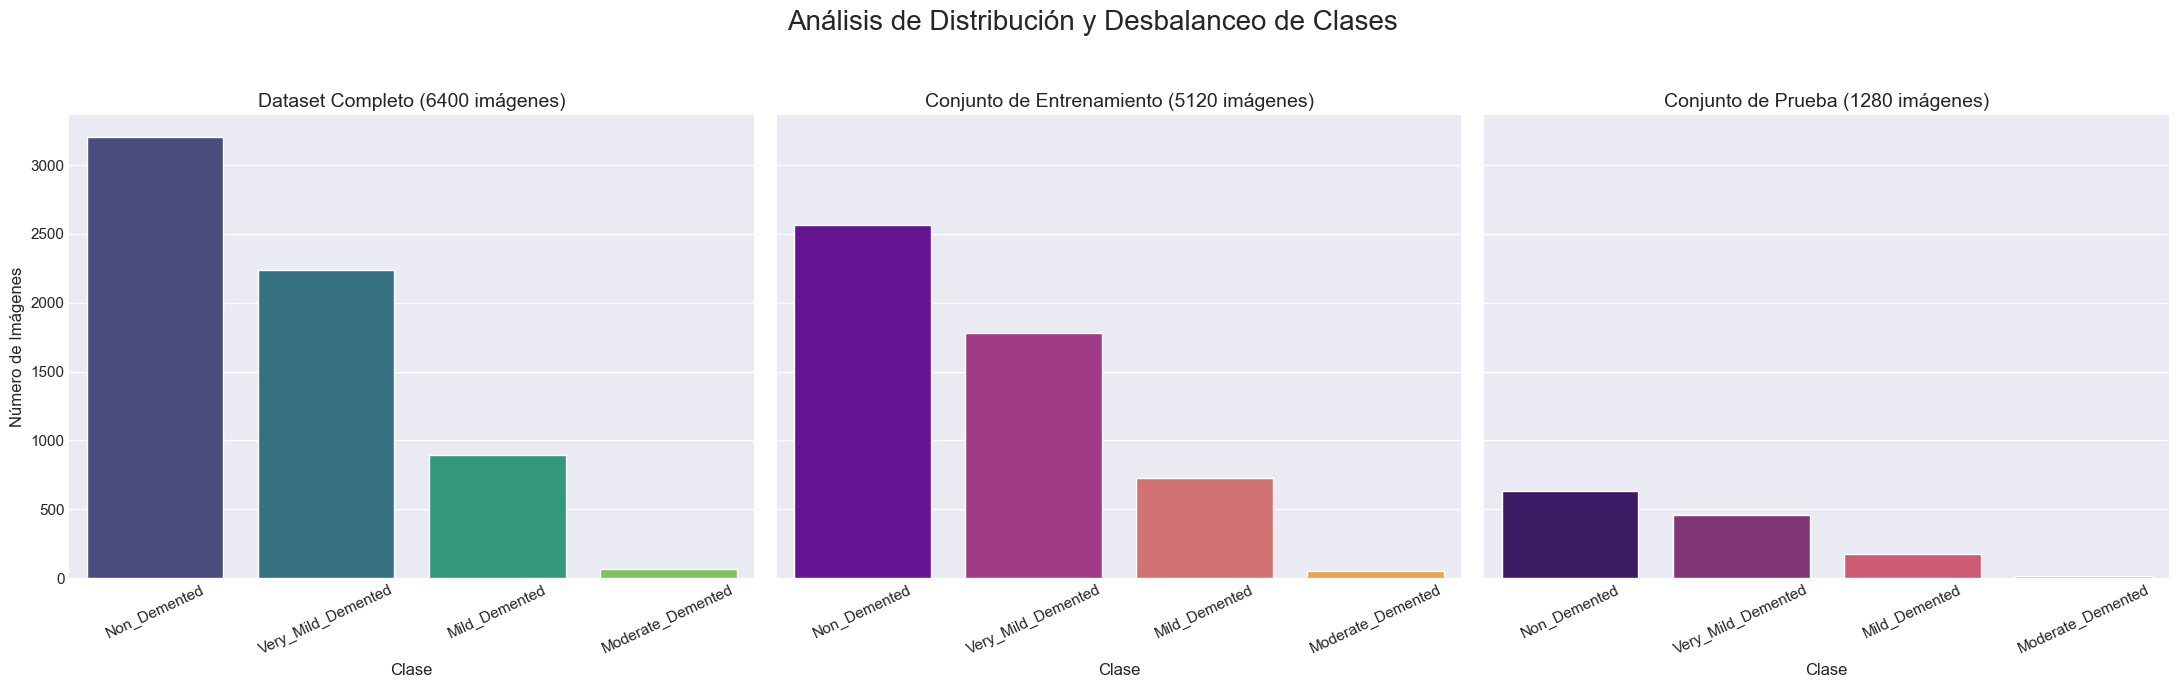

Conteo de clases en el conjunto de ENTRENAMIENTO:
label_name
Non_Demented          2566
Very_Mild_Demented    1781
Mild_Demented          724
Moderate_Demented       49
Name: count, dtype: int64


Conteo de clases en el conjunto de PRUEBA:
label_name
Non_Demented          634
Very_Mild_Demented    459
Mild_Demented         172
Moderate_Demented      15
Name: count, dtype: int64


In [7]:
# --- Análisis de Distribución ---

fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
fig.suptitle('Análisis de Distribución y Desbalanceo de Clases', fontsize=20)

# Gráfico 1: Dataset Completo
sns.countplot(ax=axes[0], data=df, x='label_name', palette='viridis', order=df['label_name'].value_counts().index)
axes[0].set_title('Dataset Completo (6400 imágenes)', fontsize=14)
axes[0].set_xlabel('Clase', fontsize=12)
axes[0].set_ylabel('Número de Imágenes', fontsize=12)
axes[0].tick_params(axis='x', rotation=25)

# Gráfico 2: Conjunto de Entrenamiento
train_data = df[df['split'] == 'train']
sns.countplot(ax=axes[1], data=train_data, x='label_name', palette='plasma', order=train_data['label_name'].value_counts().index)
axes[1].set_title('Conjunto de Entrenamiento (5120 imágenes)', fontsize=14)
axes[1].set_xlabel('Clase', fontsize=12)
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=25)

# Gráfico 3: Conjunto de Prueba
test_data = df[df['split'] == 'test']
sns.countplot(ax=axes[2], data=test_data, x='label_name', palette='magma', order=test_data['label_name'].value_counts().index)
axes[2].set_title('Conjunto de Prueba (1280 imágenes)', fontsize=14)
axes[2].set_xlabel('Clase', fontsize=12)
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=25)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Imprimir los conteos exactos para mayor claridad
print("Conteo de clases en el conjunto de ENTRENAMIENTO:")
print(train_data['label_name'].value_counts())
print("\n" + "="*50 + "\n")
print("Conteo de clases en el conjunto de PRUEBA:")
print(test_data['label_name'].value_counts())

Análisis del Desbalanceo de Clases:

* Desbalance Severo: Los gráficos confirman un desbalance muy pronunciado. La clase Non_Demented constituye el 50% del dataset (3200 de 6400 imágenes), mientras que la clase Moderate_Demented representa solo el 1% (64 imágenes).

* Implicaciones Críticas: Este es el hallazgo más importante del AED. Un modelo entrenado con estos datos tenderá a predecir la clase mayoritaria (Non_Demented) para maximizar su precisión (accuracy), ignorando casi por completo las clases minoritarias. Esto daría como resultado un modelo inútil en la práctica, ya que fallaría en detectar los casos más severos de la enfermedad.

* Requisito del Proyecto: El enunciado del proyecto pide explícitamente "aplicar técnicas para manejar el desbalanceo de clases". Este análisis justifica la necesidad de dichas técnicas (ej. oversampling con SMOTE, class weights en el modelo, etc.) que serán implementadas en la Fase 3: Tratamiento de los Datos.

* Distribución Estratificada: Al comparar los gráficos de entrenamiento y prueba, observamos que la proporción de clases es la misma en ambos conjuntos. Esto es excelente, ya que significa que el conjunto de prueba es una representación fiel del de entrenamiento, permitiendo una evaluación justa del modelo.

#### 2.3.3. Visualización de Imágenes de Muestra
Para comprender la naturaleza de los datos de entrada, es fundamental visualizar ejemplos de cada clase.

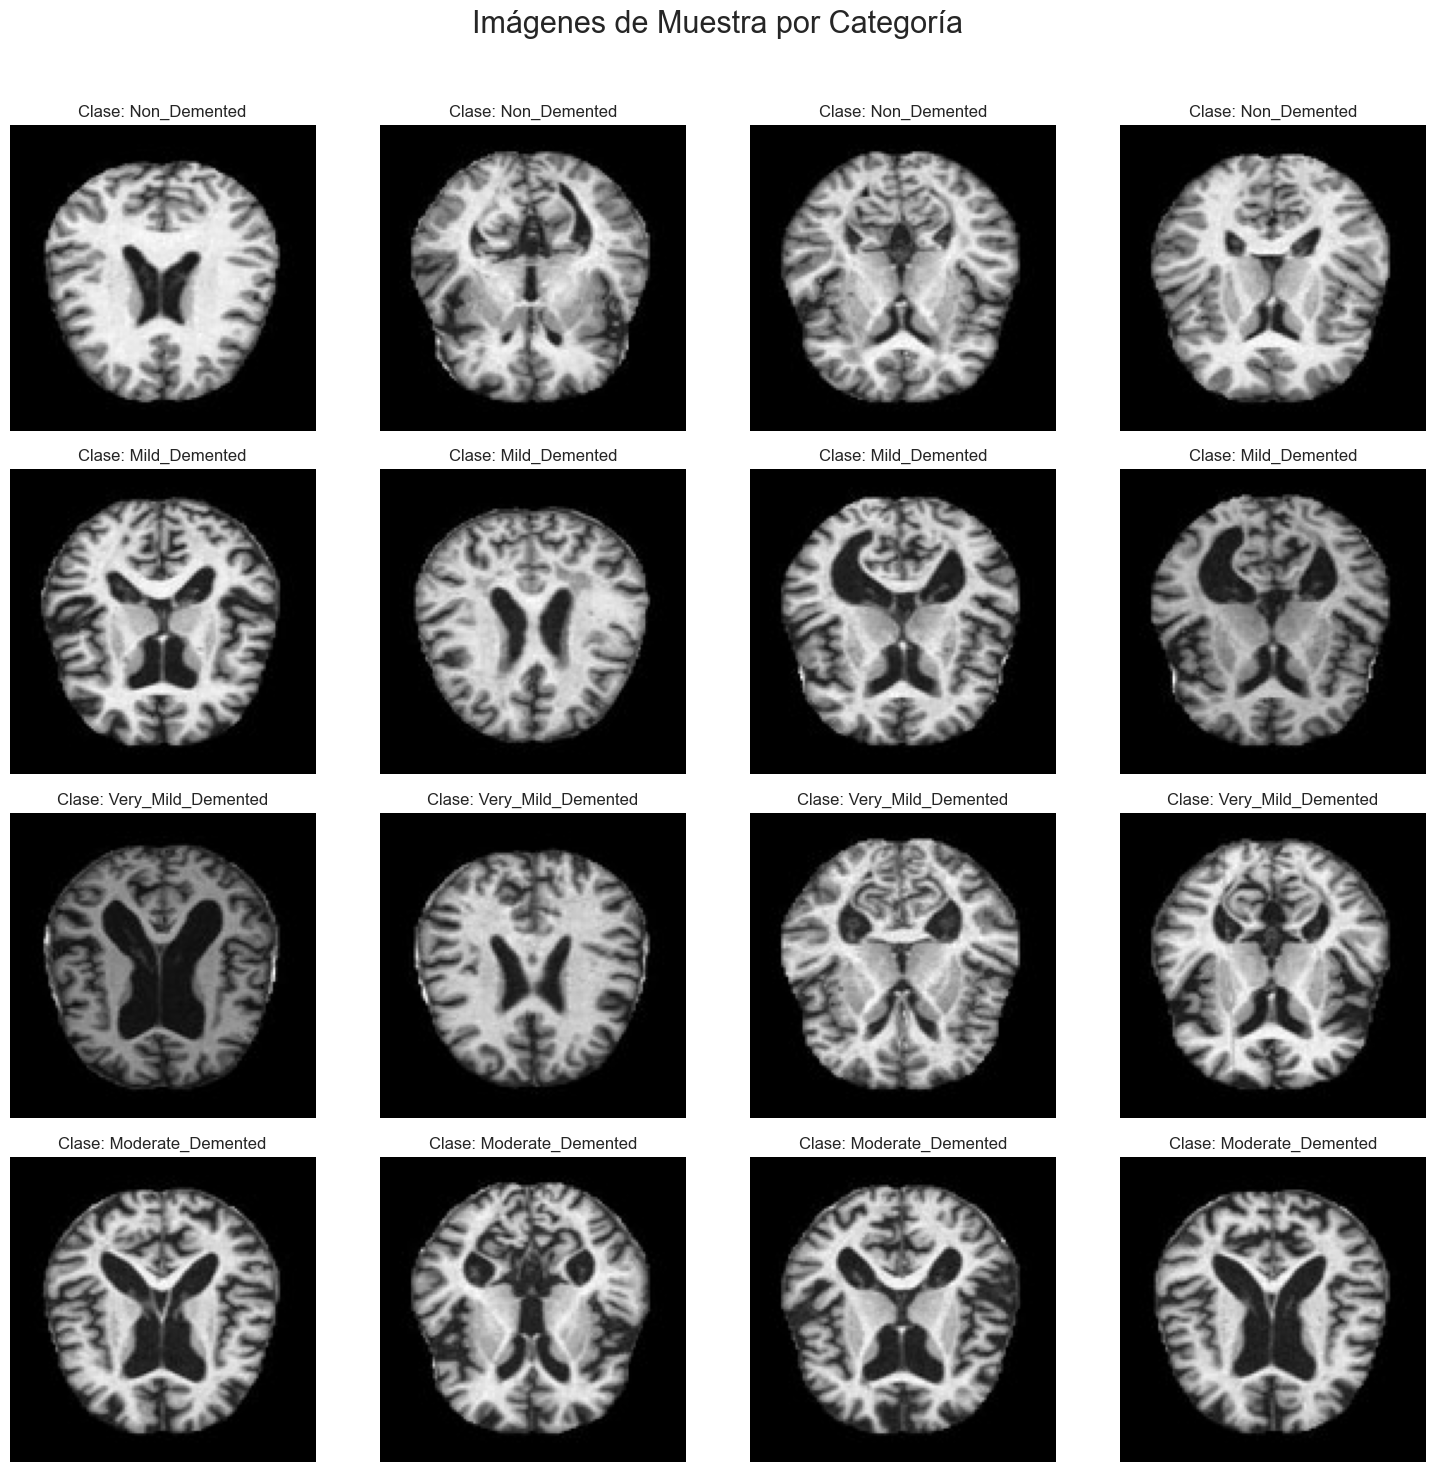

In [8]:
# Obtener las clases únicas para iterar
unique_labels = df['label_name'].unique()

# Creamos una figura para mostrar 4 imágenes por cada una de las 4 clases
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Imágenes de Muestra por Categoría", fontsize=22)

for i, label in enumerate(unique_labels):
    # Tomamos 4 muestras aleatorias de la clase actual
    sample_rows = df[df['label_name'] == label].sample(4)
    for j, (index, row) in enumerate(sample_rows.iterrows()):
        # Extraemos y abrimos la imagen desde los bytes
        image_bytes = row['image']['bytes']
        img = Image.open(io.BytesIO(image_bytes))
        
        # Mostramos la imagen
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f"Clase: {label}", fontsize=12)
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 2.3.4. Análisis de Dimensiones y Modos de Imagen
Verificamos si todas las imágenes tienen el mismo tamaño y modo de color (ej. RGB, escala de grises). Esto es un requisito para las entradas de las redes neuronales.


In [9]:
# Usaremos contadores para registrar las dimensiones y modos
image_dims = Counter()
image_modes = Counter()

# Iteramos sobre todo el dataframe
for index, row in df.iterrows():
    try:
        image_bytes = row['image']['bytes']
        with Image.open(io.BytesIO(image_bytes)) as img:
            image_dims[img.size] += 1
            image_modes[img.mode] += 1
    except Exception as e:
        print(f"Error procesando imagen en el índice {index}: {e}")

print("Dimensiones de imagen encontradas (ancho, alto):")
for dim, count in image_dims.most_common():
    print(f"- {dim}: {count} imágenes")

print("\nModos de imagen encontrados:")
for mode, count in image_modes.most_common():
    print(f"- {mode}: {count} imágenes")

Dimensiones de imagen encontradas (ancho, alto):
- (128, 128): 6400 imágenes

Modos de imagen encontrados:
- L: 6400 imágenes


Análisis de Formato:

* Dimensiones Consistentes: El resultado confirma que todas las imágenes tienen una dimensión de (176, 208) píxeles. Esto es excelente, ya que elimina la necesidad de manejar tamaños variables, aunque probablemente las redimensionaremos a un formato cuadrado (ej., 128x128) en la Fase 3 para optimizar el entrenamiento de la CNN.

* Modo de Color: Todas las imágenes están en modo 'L', que corresponde a luminancia (escala de grises). Esto significa que cada píxel está representado por un solo valor (de 0 a 255). Esto simplifica el modelo, ya que solo tendremos un canal de color en lugar de tres (RGB).

#### 2.4. Conclusiones del Análisis Exploratorio y Próximos Pasos

Este AED nos proporciona una comprensión sólida y profunda del dataset, cumpliendo con los requisitos del proyecto.

* Dataset Completo y Limpio: No hay datos faltantes y el formato (Parquet) es eficiente.
* Desafío Principal Identificado: El desbalanceo severo de clases es el principal obstáculo a superar. Las estrategias para mitigarlo serán el pilar de la fase de preparación de datos.
* Datos de Imagen Homogéneos: Todas las imágenes son consistentes en dimensiones (176x208) y modo de color (escala de grises), lo cual facilita enormemente el preprocesamiento.
* Hoja de Ruta Clara para la Fase 3: Basado en este análisis, los siguientes pasos en la Fase 3: Tratamiento y Preparación de los Datos son:
    * Procesamiento de Imágenes: Crear una función que tome los bytes de la imagen, la convierta a un array de NumPy, la redimensione a un tamaño cuadrado (ej. 128x128) y la normalice (escalar los valores de píxeles de a).
    * Preparación para RNA vs. CNN:
        * Para la RNA, las imágenes 2D (128x128) deberán ser "aplanadas" a un vector 1D (16384 elementos).
        * Para la CNN, las imágenes se mantendrán en formato 2D (128x128x1).
    * Manejo de Desbalanceo: Implementar y probar una o más técnicas (ej., class_weight durante el entrenamiento o SMOTE en los datos de entrenamiento) para asegurar que el modelo aprenda a reconocer las clases minoritarias.
    * Codificación de Etiquetas: Convertir las etiquetas categóricas a un formato numérico que el modelo pueda entender (ej. one-hot encoding).
